# 向量化字符串操作

使用Python的一个优势是字符串处理起来比较容易。在此基础上创建的Pandas同样提供了一系列**向量化字符串操作**（vectorized string operation），它们都是处理（清洗）现实工作中的数据时不可或缺的功能。在这一节中，我们将介绍Pandas的字符串操作，学习如何用它们对一个从网络采集来的杂乱无章的数据集进行局部清理。

## Pandas字符串操作简介

前面的章节已经介绍过如何用NumPy和Pandas进行一般的运算操作，因此我们也能简便快速地对多个数组元素执行同样的操作，例如：

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

> 分清楚：
> 1. 列表\[\]
> 1. 元组\(\)
> 1. 数组np.array(\[\])
> 1. 字典\{\}

**向量化**操作简化了纯数值的数组操作语法——我们不需要再担心数组的长度和维度，只需要关心需要的操作。然而，由于NumPy并没有为字符串数组提供简单的接口，因此需要通过繁琐的for循环来解决问题：

In [2]:
data = ['Peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

虽然这么做对于一些数据可能是有效的，但是假如数据中出现了缺失值，那么这样做就会引起异常，例如：

In [4]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas为字符串的Series和Index对象提供的str属性堪称两全其美的方法，它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值。例如，我们用前面的数据data创建了一个Pandas的Series：

In [6]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

现在就可以直接调用转换大写方法capitalize()将所有的字符串变成大写形式，缺失值会自动被跳过：

In [7]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

在str属性后面用Tab键，可以看到Pandas支持的所有向量化字符串方法。

In [9]:
names.str?

## Pandas字符串方法列表

Pandas绝大多数的字符串语法都很直观，甚至都可以列成一个表格。在深入论述后面的内容之前，让我们先从这一步开始，这一节的示例将采用一些人名来演示：

In [10]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle',
                   'Terry Jones', 'Michael Palin'])

### 与Python字符串方法相似的方法

几乎所有Python内置的字符串方法都被复制到Pandas的向量化字符串方法中。下面的表格列举了Pandas的str方法借鉴Python字符串方法的内容：

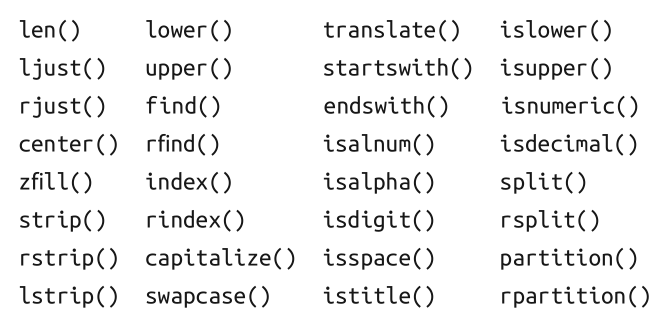

需要注意的是，这些方法的返回值不同，例如lower()方法返回一个字符串Series：

In [11]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

但有些方法返回数值：

In [12]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

有些方法返回布尔值：

In [13]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

还有些方法返回列表或其他复合值：

In [14]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [15]:
monte.str.split?

接下来会进一步学习这类由列表元素构成的Series(series-of-lists)对象。

### 使用正则表达式的方法

还有一些支持正则表达式的方法可以用来处理每个字符串元素。表3-4中的内容是Pandas向量化字符串方法根据Python标准库的re模块函数实现的API。

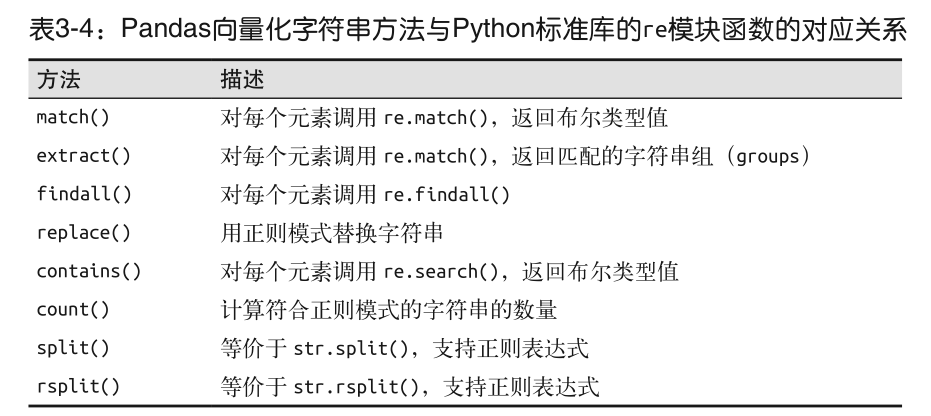

通过这些方法，你就可以实现各种有趣的操作了。例如，可以提取元素前面的连续字母作为每个人的名字（first name）：

In [16]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


> 这意味着我要熟悉正则表达式

我们还能实现更加复杂的操作，例如找出所有开头和结尾都是辅音字母的名字：

In [17]:
monte.str.findall('^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

将正则表达式应用到Series和DataFrame之中，能实现更多的数据分析和清洗方法。

### 其他字符串方法

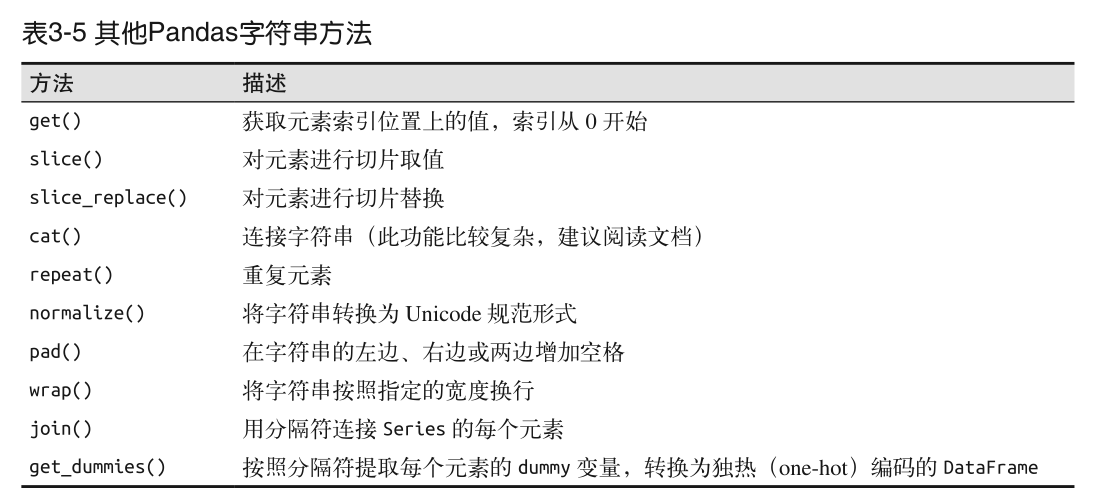


（1）**向量化字符串的取值与切片操作。** 这里需要指出，get()和slice()操作可以从每一个字符串数组中获取向量化元素。例如，我们可以从str.slice(0, 3)获取每个字符串数组的前三个字符。通过python的标准方法也能取得相同的效果，例如df.str.slice(0, 3)等价于df.str\[0:3\]：

In [18]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

df.str.get(i)与df.str\[i\]的按索引取值效果类似。

get()与slice()还可以在split()操作之后使用。例如，要获得每个姓名的姓(last name)，可以结合用split()与get()：

In [19]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

（2）**指标变量。** get_dummies()方法。

In [21]:
full_mote = pd.DataFrame({'name': monte,
                          'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                                   'B|C|D']})
full_mote

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [22]:
full_mote['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


通过Pandas自带的这些字符操作方法，你可以建立一个功能无比强大的字符串处理程序来清洗自己的数据了。

虽然本书将不再继续介绍这些方法，但是我们可以仔细阅读Pandas在线文档中"working with Text Data"。

## 案例：食谱数据库

目标是将这些食谱数据解析为食材列表，这样就可以根据现有的食材快速找到食谱。

读取数据：

In [42]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:--

In [44]:
!gunzip recipeitems-latest.json.gz

In [41]:
import pandas as pd
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError: ", e)

ValueError:  Expected object or value


这里是因为数据已经下载不了了，所以没办法做实验。